[View in Colaboratory](https://colab.research.google.com/github/cluePrints/data-sci-fience/blob/master/fast_ai_1_0_11_GPU_collab_example_2018_Oct_20.ipynb)

In [0]:
import tensorflow as tf
device = tf.test.gpu_device_name()
assert 'GPU' in device, "Expected device ({device}) to be GPU. Please follow Runtime > Change runtime type > GPU".format(device=device)

In [8]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html --quiet

tcmalloc: large alloc 1073750016 bytes == 0x61680000 @  0x7f436611b2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


In [9]:
!pip install fastai --quiet

torchvision-nightly 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.


In [10]:
!pip freeze

absl-py==0.5.0
altair==2.2.2
astor==0.7.1
beautifulsoup4==4.6.3
bleach==3.0.2
cachetools==2.1.0
certifi==2018.10.15
chardet==3.0.4
crcmod==1.7
cycler==0.10.0
cymem==2.0.2
cytoolz==0.9.0.1
dataclasses==0.6
decorator==4.3.0
defusedxml==0.5.0
dill==0.2.8.2
entrypoints==0.2.3
fastai==1.0.11
fastprogress==0.1.10
filelock==3.0.9
future==0.16.0
gast==0.2.0
google-api-core==1.5.0
google-api-python-client==1.6.7
google-auth==1.4.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.2.0
google-cloud-bigquery==1.1.0
google-cloud-core==0.28.1
google-cloud-language==1.0.2
google-cloud-storage==1.8.0
google-cloud-translate==1.3.1
google-colab==0.0.1a1
google-resumable-media==0.3.1
googleapis-common-protos==1.5.3
grpcio==1.15.0
h5py==2.8.0
httplib2==0.11.3
idna==2.6
ipykernel==4.6.1
ipython==5.5.0
ipython-genutils==0.2.0
ipywidgets==7.4.2
Jinja2==2.10
joblib==0.12.5
jsonschema==2.6.0
jupyter==1.0.0
jupyter-client==5.2.3
jupyter-console==6.0.0
jupyter-core==4.4.0
Keras==2.1.6
Keras-Applications==1.0.6

In [0]:
import torchvision.models as tvm
from fastai import *
from fastai.vision import *
from fastai.vision.data import *

In [0]:
!mkdir -p data && ls dogscats.zip 2>/dev/null >/dev/null || $(wget --quiet files.fast.ai/data/dogscats.zip && unzip -qq dogscats.zip -d data/)

In [13]:
!find data | wc -l

37543


In [14]:
ls data/dogscats

models/  sample/  test1/  train/  valid/


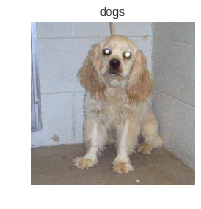

In [19]:
# num_workers is important, otherwise lack of `/dev/shm` memory 
data = ImageDataBunch.from_folder("data/dogscats", ds_tfms=get_transforms(), tfms=imagenet_norm, size=224, num_workers=0)
img,label = data.valid_ds[-1]
img.show(title=data.classes[label])

In [24]:
learn = ConvLearner(data, models.resnet34, metrics=accuracy)
%time learn.fit_one_cycle(1)

epoch  train loss  valid loss  accuracy
1      0.046994    0.025339    0.991500
CPU times: user 8min 1s, sys: 55.9 s, total: 8min 57s
Wall time: 8min 58s


In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          40G   11G   27G  28% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G     0  6.4G   0% /var/colab
/dev/sda1        46G   12G   34G  26% /etc/hosts
shm              64M  4.0K   64M   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware
